# Machine Learning con scikit-learn

## Importo le librerie necessarie al progetto

In [1]:
import random

import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt



import my_functions as mf



## Carico il dataset su cui lavorare

In [2]:
dig = load_digits()

In [3]:
dig.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(dig.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## EDA con pandas/numpy/matplotlib

In [5]:
dig.data.shape

(1797, 64)

In [6]:
# dig.data contiene 1797 righe e 64 colonne

In [12]:
dig_df = pd.DataFrame(dig.data)

In [8]:
dig.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

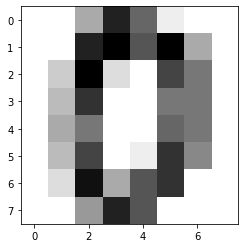

In [9]:
plt.imshow(dig.images[0], cmap=plt.cm.gray_r)

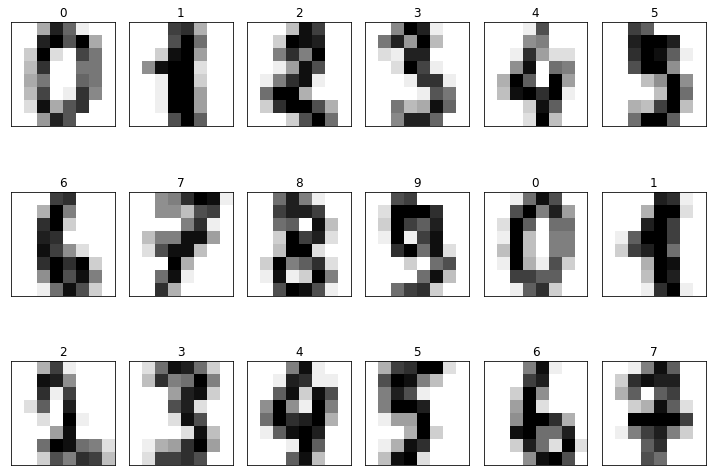

In [10]:
mf.show_multiple_img(dig.images[0:18], dig.target[0:18])

In [11]:
dig.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Data Preparation: verifica dati mancanti e trasformazione dei dati non numerici

In [13]:
dig_df.shape

(1797, 64)

In [21]:
pd.set_option('display.max_rows', None)

dig_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
5,1797.0,5.781859,5.666418,0.0,0.0,4.0,11.0,16.0
6,1797.0,1.362270,3.325775,0.0,0.0,0.0,0.0,16.0
7,1797.0,0.129661,1.037383,0.0,0.0,0.0,0.0,15.0
8,1797.0,0.005565,0.094222,0.0,0.0,0.0,0.0,2.0
9,1797.0,1.993879,3.196160,0.0,0.0,0.0,3.0,16.0


In [24]:
dig_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60    float64
61    float64
62    float64
63    float64
dtype: object

I dati sono tutti numerici e pronti all'uso

In [26]:
pd.set_option('display.max_rows', 20)
dig_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [32]:
# Verifica di valori Not Available
dig_df.isna().sum().sum()

0

## Train test split    
Separi i dati in 2 gruppi: il gruppo train lo utilizzo per l'addestrmaento dell'algoritmo e il gruppo 
test lo uso per verificare le performance dell'algoritmo. Tipicamente train 75% + test 25%.     


In [81]:
from sklearn.model_selection import train_test_split

SEED = 300

In [82]:
X = dig.data # dati numerici associati alla matrice delle digits
y = dig.target # target di ciascuna matrice


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = SEED)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

1


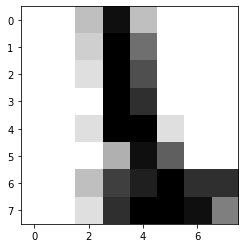

In [84]:
plt.imshow(X_train[13].reshape(8,8), cmap=plt.cm.gray_r)
print(y_train[13])

In [85]:
X_train[13].reshape(8,8)

array([[ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 10.,  0.,  0.],
       [ 0.,  0.,  4., 12., 14., 16., 13., 13.],
       [ 0.,  0.,  2., 13., 16., 16., 15.,  8.]])

## Definisco e creo il modello

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn_model = KNeighborsClassifier(n_neighbors=20)

## Addestramento del modello: model.fit

In [126]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

## Test del modello e valutazione del modello

In [127]:
y_predicted = knn_model.predict(X_test)

In [128]:
print("Real     \t",y_test[y_predicted != y_test])
print("Predicted\t",y_predicted[y_predicted != y_test])


Real     	 [8 3 8 8 4 8 2 5 8 6 8 8 9 8 9]
Predicted	 [1 7 5 1 8 1 8 9 1 8 1 2 5 3 7]


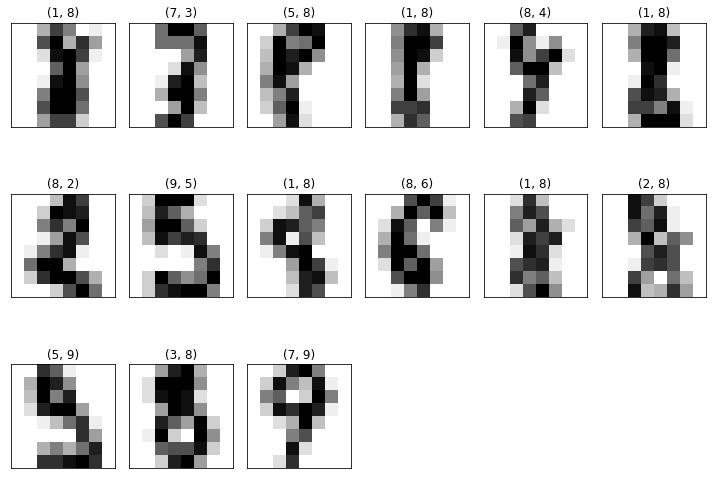

In [129]:
images =  X_test[y_predicted != y_test].reshape((X_test[y_predicted != y_test].shape[0],8,8))
targets = zip(y_predicted[y_predicted != y_test],y_test[y_predicted != y_test])
mf.show_multiple_img(images, targets)

In [130]:
images =  X_test[y_predicted != y_test]

In [131]:
knn_model.score(X_test, y_test)

0.9666666666666667

## Ottimizzazione degli iperparametri